# Holiday Package Prediction - Trips & Travel Dataset
**Life cycle of Machine Learning Project**

* Understanding the Problem Statement
* Collecting Data
* Exploratory Data Analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choosing optimal model

## 1) Problem statement.

* "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. 
* One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. 
* The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. 
* However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## 2) Data Collection.
* The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
* The data consists of 20 column and 4888 rows.

### 2.1 Import Data and Required Packages

**Importing packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

**Importing Trips & Travel dataset**

In [4]:
df = pd.read_csv("Travel.csv")

**First 10 Observations**

In [6]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


**Shape of dataset**

In [9]:
df.shape

(4888, 20)

**Summary Statisitics of dataset**

In [10]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Checking datatypes and non-null counts**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Report**
* There are 20 columns, 14 number types and 6 object types.
* There are null values present.

## 3) Exploratory Data Analysis

**Extracting numerical features and continuous features**

In [23]:
df1 = df.copy()
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes !='object']
categorical_features = [feature for feature in df1.columns if df1[feature].dtypes =='object']

In [24]:
#Printing both kind of features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical features : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [25]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


### Feature Information
* **CustomerID:** Unique customer identity number.
* **ProdTaken:** Whether the product pitched was taken or not.
* **Age:** How old customer was.
* **TypeofContact:** How customer was contacted (Company Invited or Self Inquiry)
* **CityTier:** City tier depends on the development of a city, population, facilities, and living standards.
* **DurationOfPitch:** Duration of the pitch by a salesperson to the customer
* **Occupation:** What was the occupation of customer (Salaried, Small Business or Other)
* **Gender:** What was the gender of customer (Male or Female)
* **NumberOfPersonVisiting:** Total number of persons planning to go trip with customer
* **NumberOfFollowups:** Total number of follow-ups has been done by the salesperson after the sales pitch
* **ProductPitched:** Product pitched by the salesperson
* **PreferredPropertyStar:** Preferred hotel property rating by customer.
* **MaritalStatus:** Whether customer is married or not.
* **PitchSatisfactionScore:** Sale pitch satisfaction score
* **Passport:** The customer has a passport or not (0: No, 1: Yes)
* **NumberOfTrips:** Average number of trips in a year by customer
* **OwnCar:** Whether customer own car or not
* **NumberOfChildrenVisiting:** Number of children age 5 or less visiting on trip
* **Designation:** Position of customers in current organization.
* **MonthlyIncome:** Income of customer

**Proportion counts of various categories among categorical variables**

In [27]:
df2 = df.copy()
for elem in categorical_features:
    print(f"For the feature '{elem}', we have the following proportion data")
    print(df2[elem].value_counts(normalize = True)*100)
    print("!-----------------------------------------!")

For the feature 'TypeofContact', we have the following proportion data
Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
!-----------------------------------------!
For the feature 'Occupation', we have the following proportion data
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
!-----------------------------------------!
For the feature 'Gender', we have the following proportion data
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
!-----------------------------------------!
For the feature 'ProductPitched', we have the following proportion data
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
!-----------------------------------------!
For the feature 'MaritalStatus', we have the follow

## Univariate Analysis

### Numerical Features

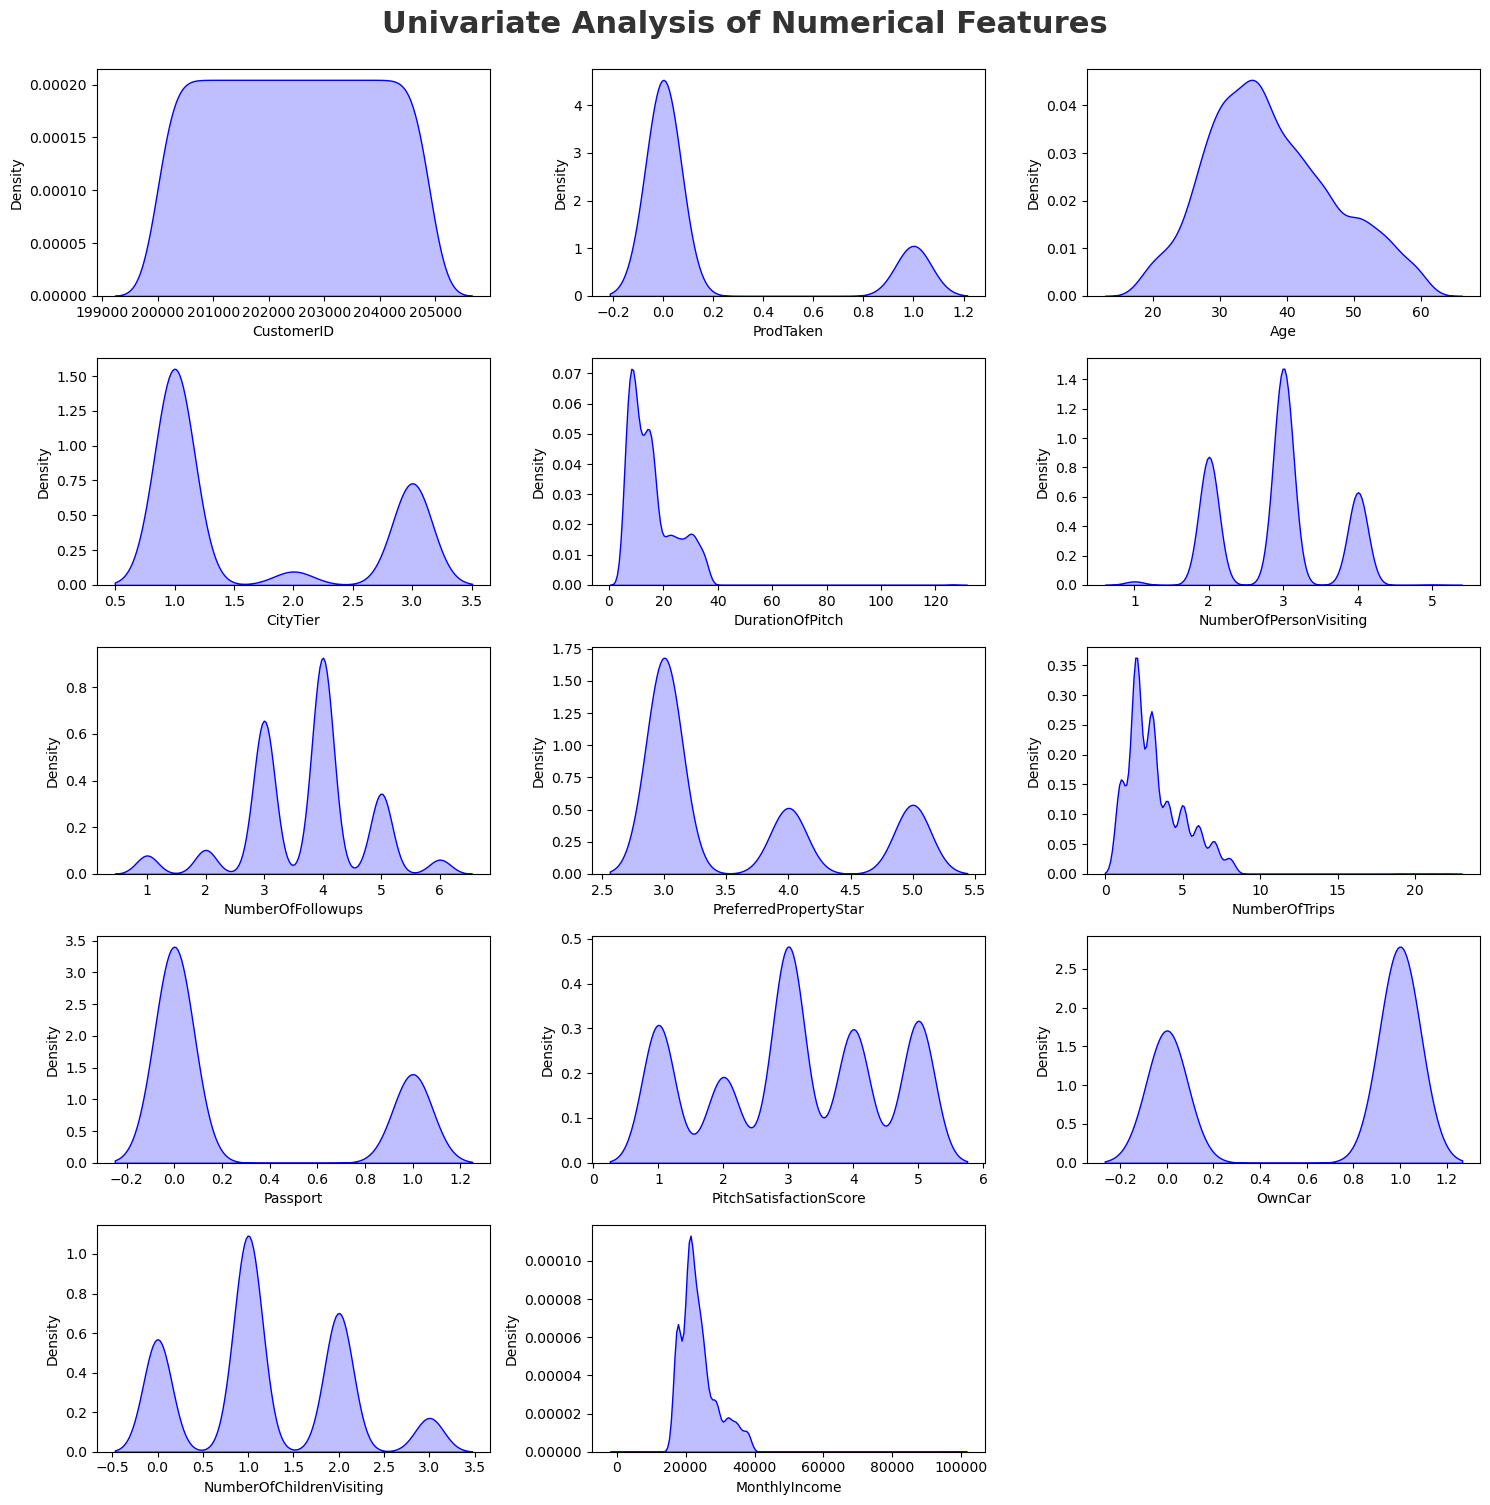

In [28]:
df3 = df.copy()
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize= 22, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df3[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#save fig
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Univariate_Num")

**We will define an new dataframe 'df_converted' and there we will convert 'ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore' to object type.**

In [30]:
df_type_converted = df.copy()
df_type_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']]= df_type_converted[['ProdTaken', 'CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore']].astype('object')


In [33]:
df_type_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   object 
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   object 
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   object 
 9   NumberOfFollowups         4843 non-null   object 
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   object 
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   object 
 14  Passport

### Categorical Features

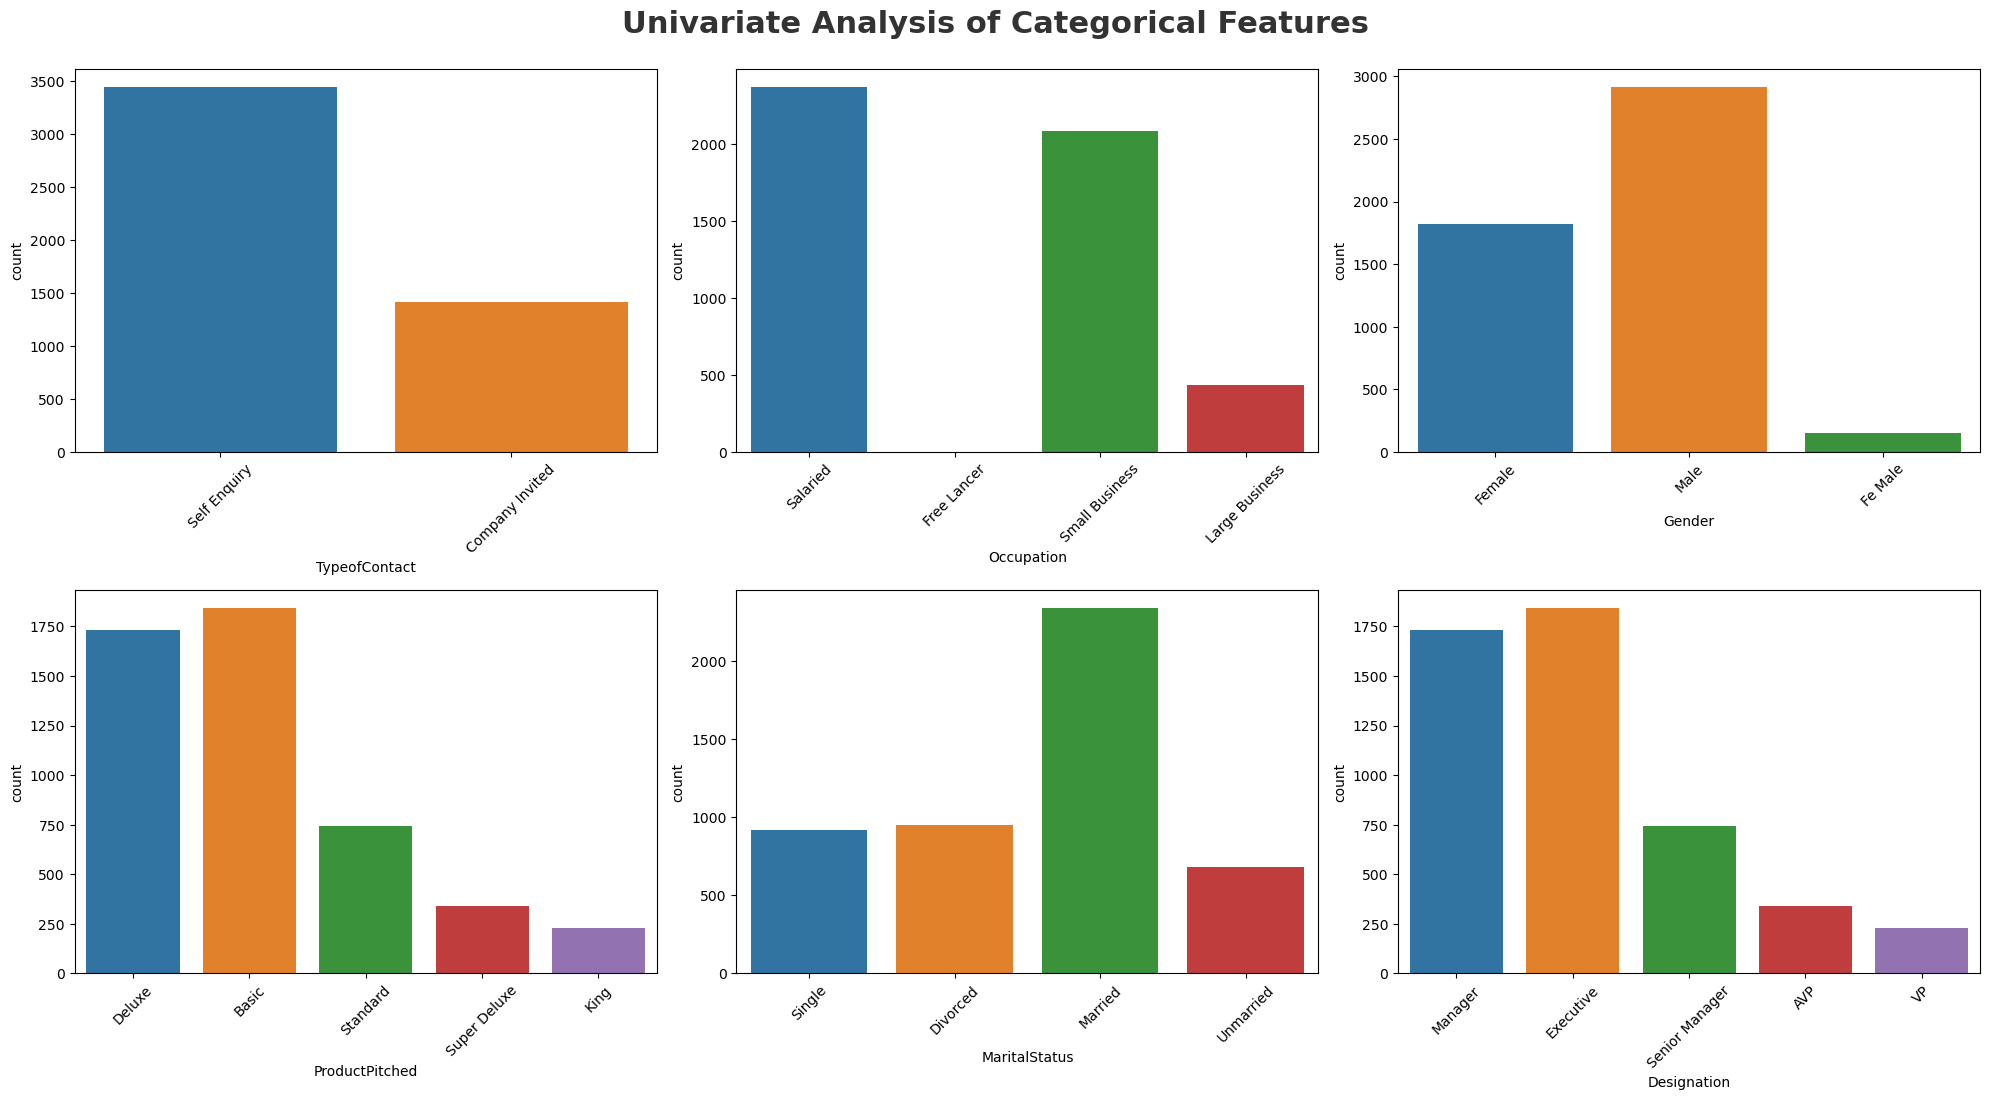

In [36]:
df3 = df.copy()
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize= 22, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(categorical_features)):
   
    plt.subplot(3,3,i+1)
    sns.countplot(df3[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#save fig
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Univariate_Cat")

### Multivariate Analysis

**Correlation Matrix**

*Skipping 'CustomerID' feature*

In [37]:
df[numerical_features[1:]].corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


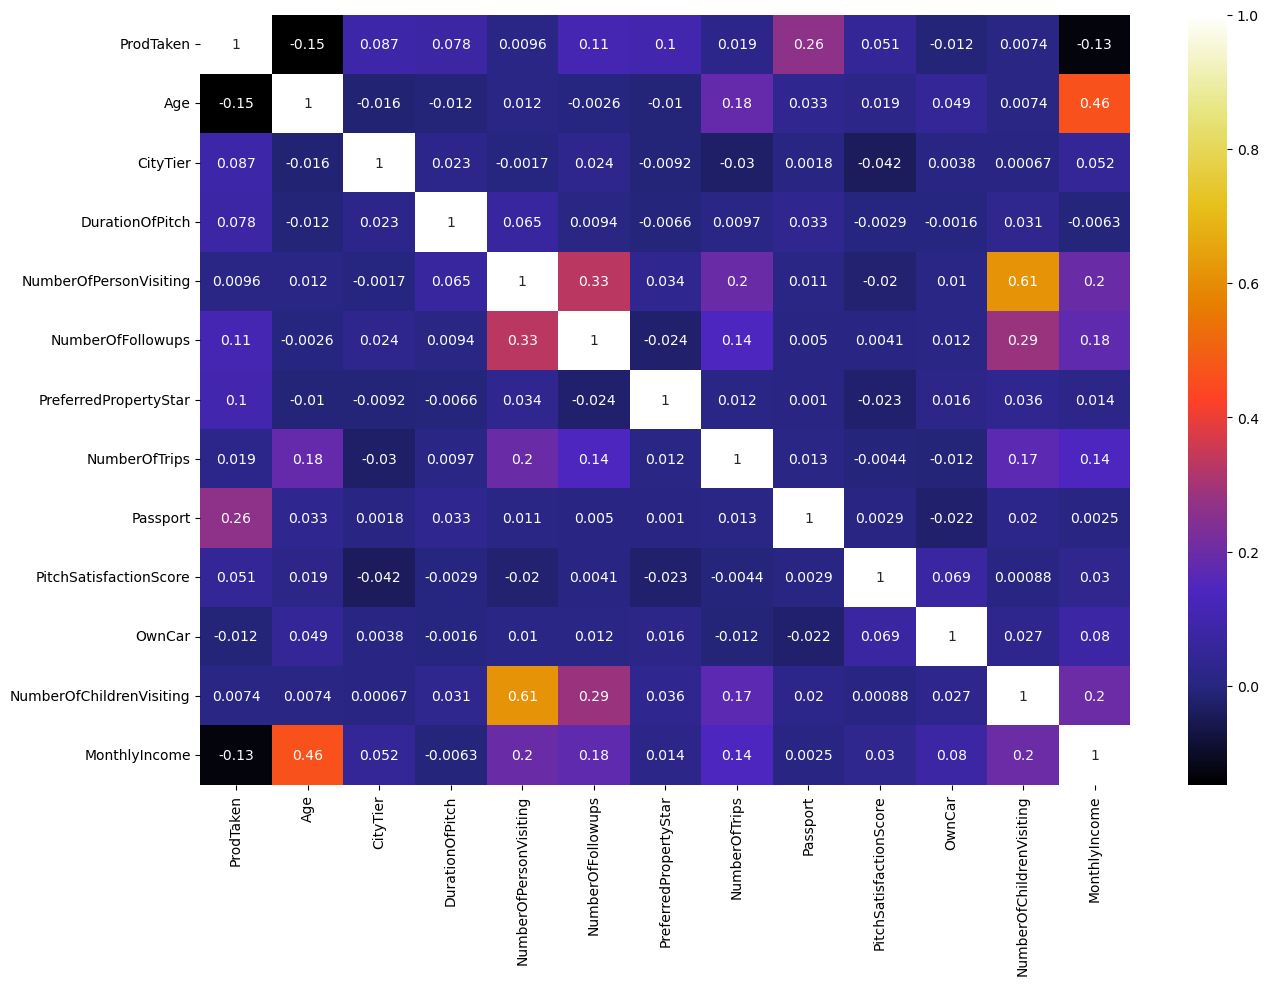

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_features[1:]].corr(), cmap ="CMRmap", annot=True)
plt.show()

**Report**
* Overall the correlation among numerical features are on the lower end.
* Only outlier is the correlation between 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting' at 0.61
* Our dependent variable 'ProdTaken' has very little correlation with features such as 'NumberOfChildrenVisiting','NumberOfTrips', 'NumberOfPersonVisiting'

### Check Correlation between Categorical features and 'ProdTaken'

In [39]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


In [44]:
from scipy.stats import chi2_contingency
chi2_test = []

for elem in categorical_features:
    contin_table = pd.crosstab(df['ProdTaken'], df[elem])
    val = chi2_contingency(contin_table)
    if val[1]<0.05:
        chi2_test.append("Rejected Null")
    else:
        chi2_test.append("Fail to reject Null")
    
hypo_table = pd.DataFrame(data = [categorical_features,chi2_test]).T
hypo_table.columns=["Categorical Features","Hypothesis Result"]
hypo_table

,Categorical Features,Hypothesis Result
0,TypeofContact,Rejected Null
1,Occupation,Rejected Null
2,Gender,Fail to reject Null
3,ProductPitched,Rejected Null
4,MaritalStatus,Rejected Null
5,Designation,Rejected Null


**Report**
* Except Gender, all other categorical features have significant relatonship with 'ProdTaken' target variable.

### Null Value Inspection

In [45]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Report**
* There are many null values in 8 columns, with highest number of null values in 'DurationOfPitch' column.

### Extracting Continuous and Discrete Features from Numerical Features

In [46]:
continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>=10]
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<10]

In [47]:
#printing
print('List of continuous features :',continuous_features)
print('List of discrete features :', discrete_features)

List of continuous features : ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
List of discrete features : ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


In [49]:
plt.

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


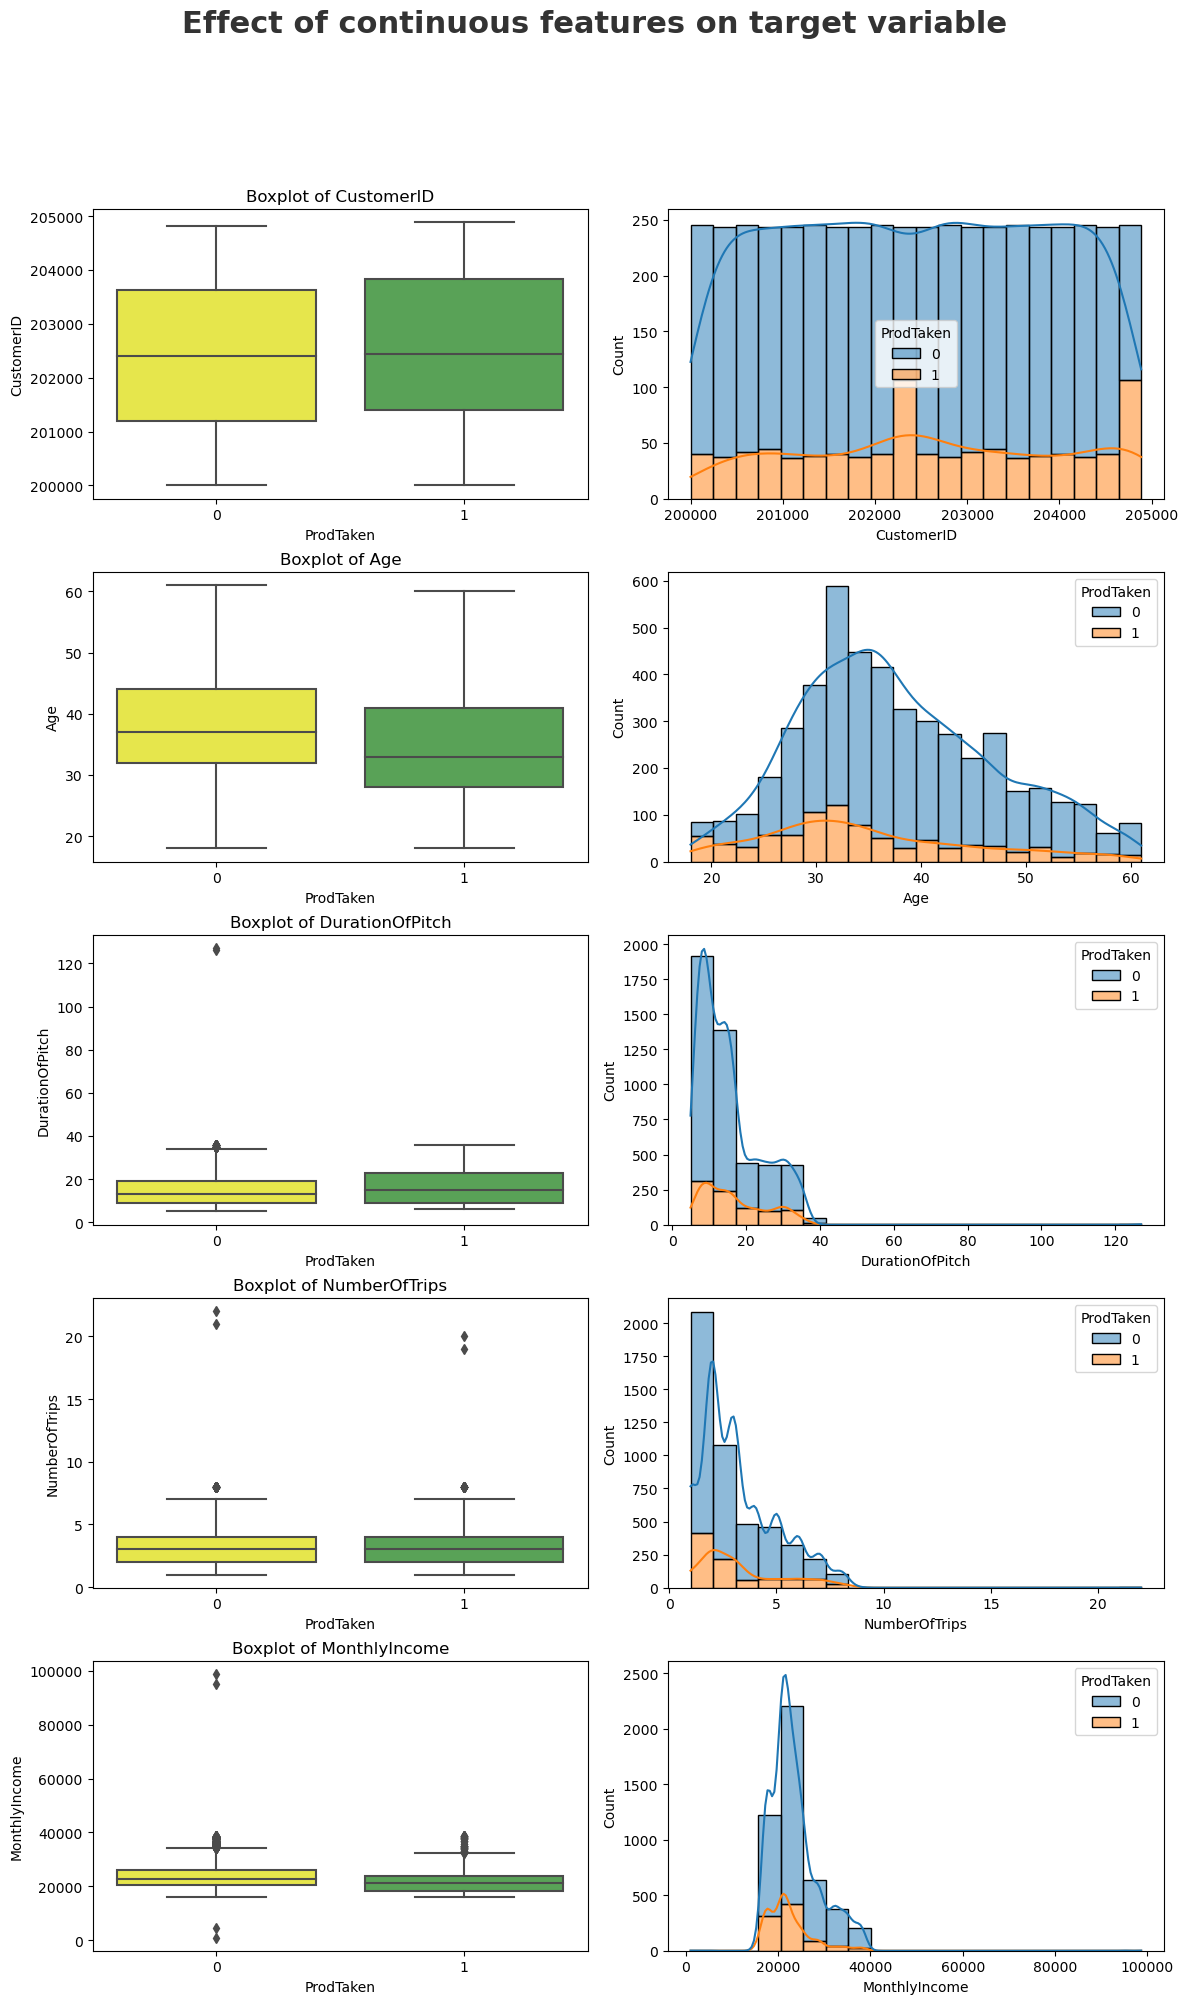

In [61]:
fig, ax = plt.subplots(5, 2, figsize=(12,20))
plt.suptitle("Effect of continuous features on target variable", fontsize= 22, fontweight='bold', alpha=0.8, y=1)
for i in range(0,len(continuous_features)):
    sns.boxplot(x=df['ProdTaken'],y=df[continuous_features[i]],palette="Set1_r", ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {continuous_features[i]}', fontsize=12)
    sns.histplot(x=df[continuous_features[i]], hue=df['ProdTaken'],bins=20, kde=True,multiple='stack',ax=ax[i,1] )

fig.tight_layout()
fig.subplots_adjust(top=0.90)

 
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\multivariate_num")
    


**Report**
* Customers with monthly income around the range 15000-25000 are more likely to purchase product.
* Duration of Pitch less than 20 minutes have high number of 'ProdTaken' as yes.

## Visualization

#### Visualizing Target Variable

In [66]:
df2 = df.copy()

In [68]:
df2['ProdTaken'] = np.where((df2['ProdTaken']==1),'Purchased','Not Purchased')

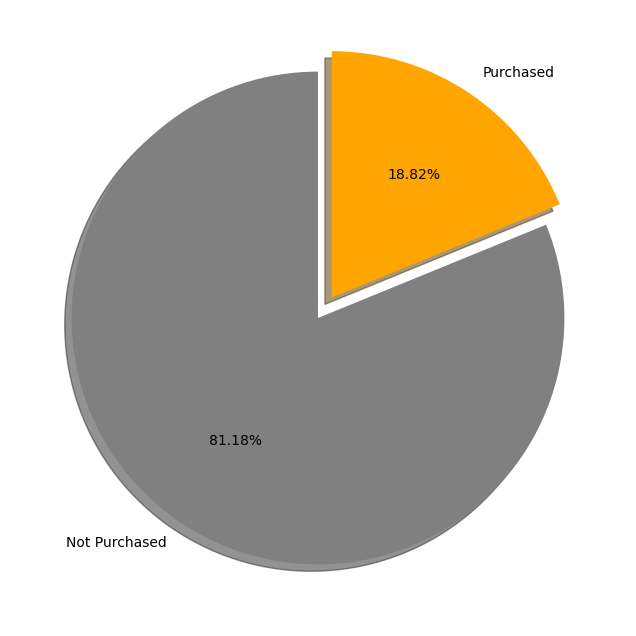

In [81]:
fig, ax = plt.subplots(figsize=(15,8))
percentage = df2['ProdTaken'].value_counts(normalize=True)*100

ax.pie(percentage,labels=["Not Purchased","Purchased"], colors=['grey','orange'], startangle=90,autopct='%1.2f%%',
        explode = (0,0.1), shadow=True)
ax.set_label('Pie Chart of target variable')


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\imbalanced_target_variable")

**Report**
* Our dataset is imbalanced at target variable.

### Distribution of Purchase/Non purchase based on Gender

In [85]:
df2['Gender'].value_counts(normalize=True)*100

Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64

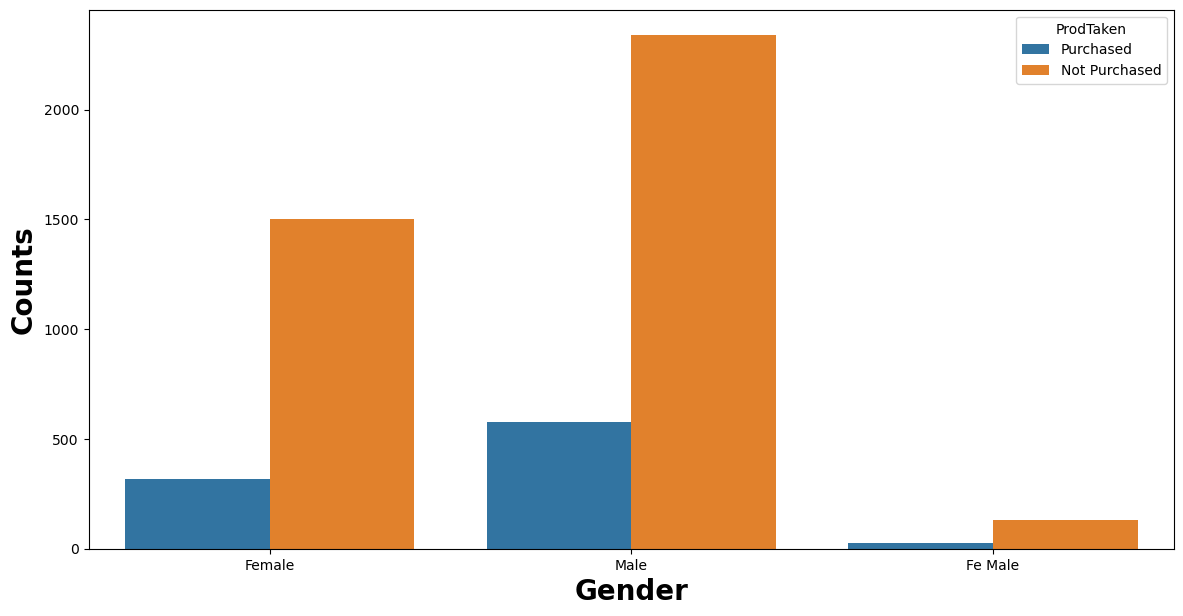

In [84]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df2['Gender'],hue=df2['ProdTaken'])
plt.xlabel("Gender",weight="bold", fontsize=20)
plt.ylabel("Counts",weight="bold", fontsize=20)


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Gender_Distribution_target_variable")
plt.show()

**Report**
* There is misspelling which needs to corrected.
* There are approx 60 percent Male and 40 percent Female.

### Distribution of Purchase/Non purchase based on Age

**Further categorizing Age into Teenagers, Adults and Seniors category**

In [90]:
bins=[10,21,50,70]
labels = ['Teenagers','Adults','Seniors']
df2['AgeGroup'] = pd.cut(df2['Age'],bins=bins,labels=labels,right=False)
df2.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,AgeGroup
0,200000,Purchased,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,Adults
1,200001,Not Purchased,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adults
2,200002,Purchased,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,Adults
3,200003,Not Purchased,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adults
4,200004,Not Purchased,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,NaN
5,200005,Not Purchased,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,Adults
6,200006,Not Purchased,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0,Seniors
7,200007,Not Purchased,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0,Adults
8,200008,Not Purchased,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0,Adults
9,200009,Not Purchased,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0,Adults


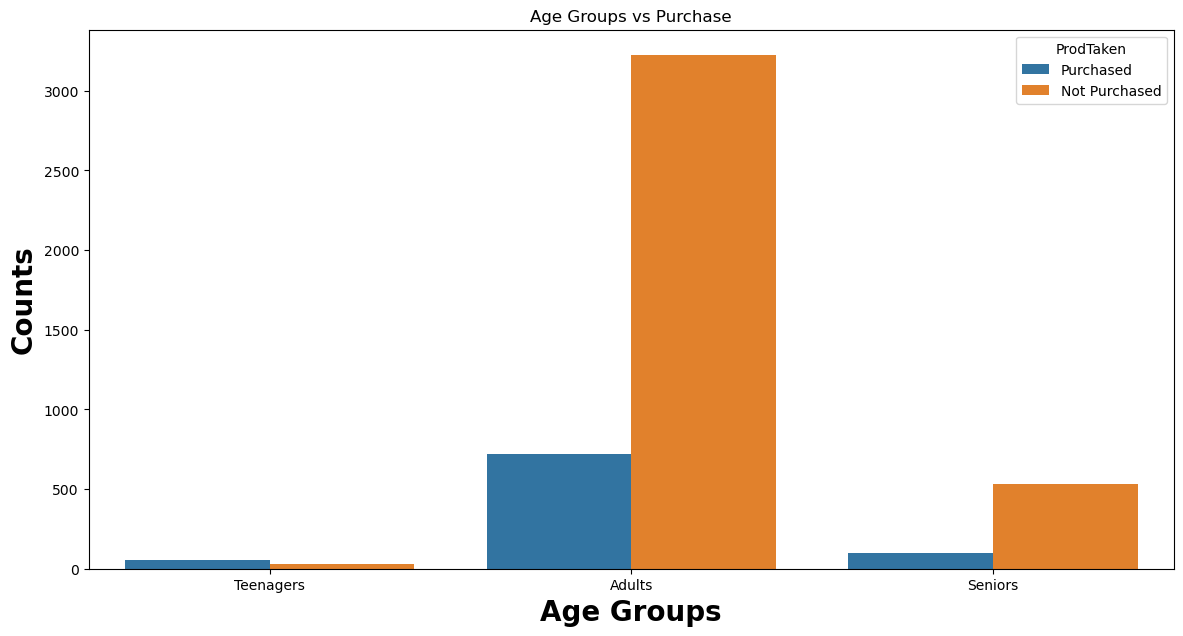

In [92]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df2['AgeGroup'],hue=df2['ProdTaken'])
plt.xlabel("Age Groups",weight="bold", fontsize=20)
plt.ylabel("Counts",weight="bold", fontsize=20)
plt.title("Age Groups vs Purchase")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Age_Group_Distribution_target_variable")
plt.show()

**Report**
* Adults have highest share of purchases, followed by Seniors and Teenagers.

### Distribution of Purchase/Non purchase based on Marital Status

In [96]:
df2.groupby('MaritalStatus')['ProdTaken'].value_counts(normalize=True)

MaritalStatus  ProdTaken    
Divorced       Not Purchased    0.869474
               Purchased        0.130526
Married        Not Purchased    0.860684
               Purchased        0.139316
Single         Not Purchased    0.668122
               Purchased        0.331878
Unmarried      Not Purchased    0.756598
               Purchased        0.243402
Name: ProdTaken, dtype: float64

In [100]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

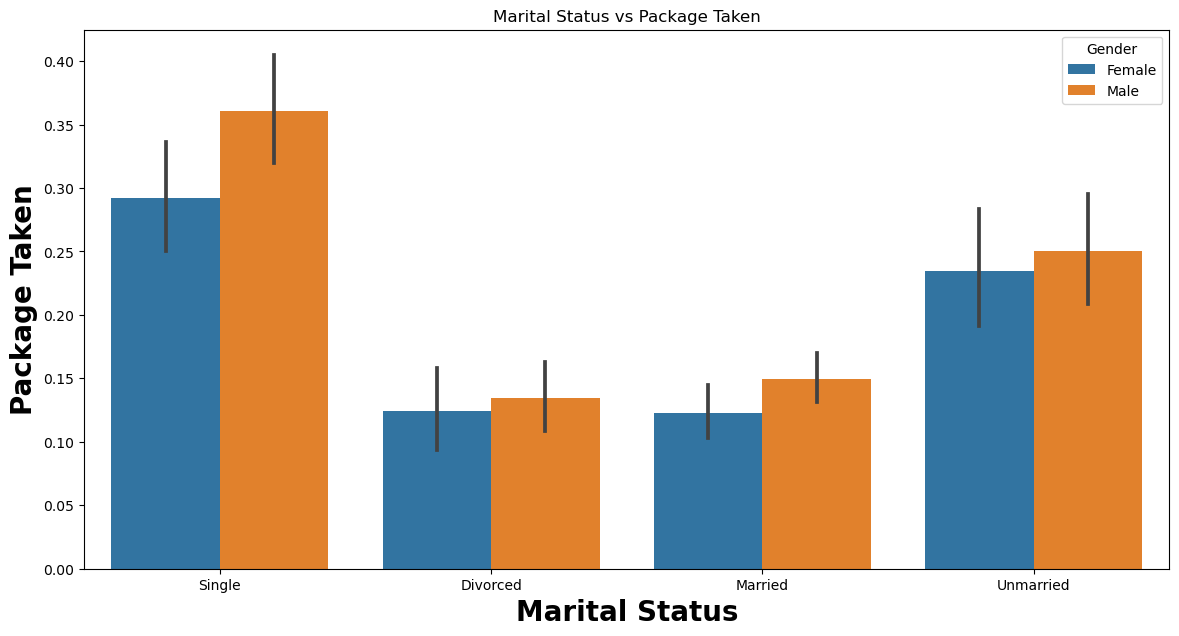

In [103]:
fig = plt.subplots(figsize=(14,7))
sns.barplot(x=df['MaritalStatus'],y=df['ProdTaken'], hue=df['Gender'])
plt.xlabel("Marital Status",weight="bold", fontsize=20)
plt.ylabel("Package Taken",weight="bold", fontsize=20)
plt.title("Marital Status vs Package Taken")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Marital_Status_Gender_Distribution_target_variable")
plt.show()

**Report**
* Single Male and Single Female are highest purchasers of holiday packages.

### Duration Of Pitch vs Product Purchase

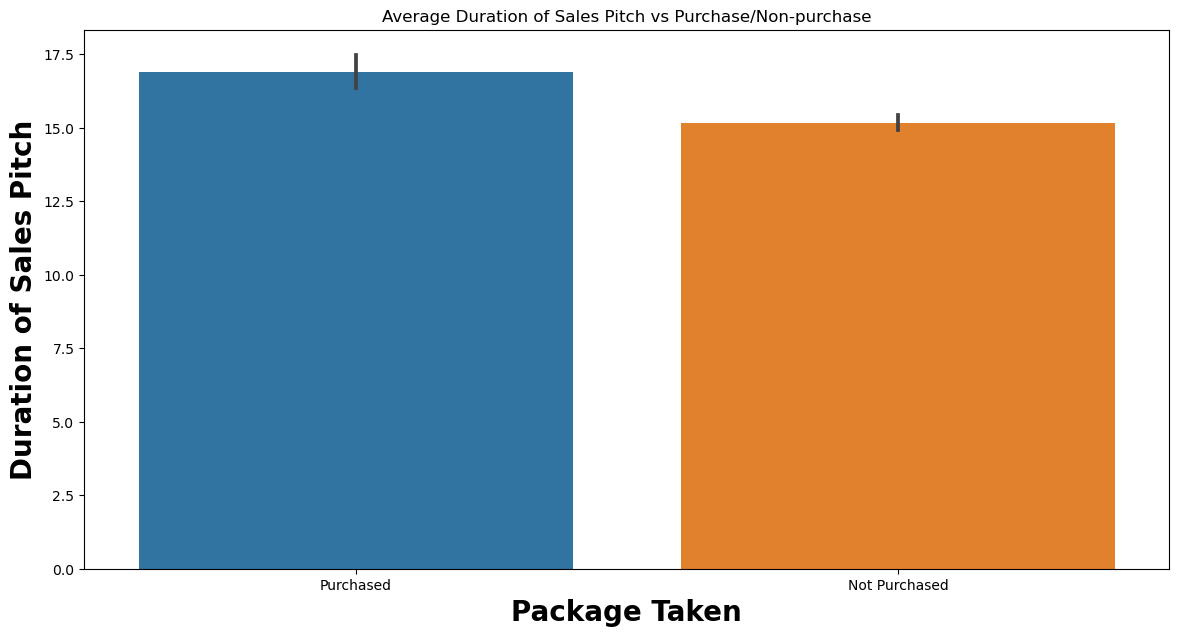

In [110]:
fig = plt.subplots(figsize=(14,7))
sns.barplot(y=df2['DurationOfPitch'],x=df2['ProdTaken'])
plt.ylabel("Duration of Sales Pitch",weight="bold", fontsize=20)
plt.xlabel("Package Taken",weight="bold", fontsize=20)
plt.title("Average Duration of Sales Pitch vs Purchase/Non-purchase")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Duration_Pitch_Distribution_target_variable")
plt.show()

**Report**
* Average duration time of Sale's pitch to Purchasers : 16.87 minutes
* Average duration time of Sale's pitch to Non Purchasers : 15.16  minutes

**Finding percentage of package sold between <10 minutes, 10-30 minutes,>30 minutes of pitch duration**

In [113]:
df1=df.copy()

In [125]:
df1_less_than_10 = df1[(df1['ProdTaken']==1) & (df1['DurationOfPitch']<10)].shape[0]
df1_bet_10_30 = df1[(df1['ProdTaken']==1) & ((df1['DurationOfPitch']>=10) & (df1['DurationOfPitch']<=30))].shape[0]
df1_more_than_30 = df1[(df1['ProdTaken']==1) & (df1['DurationOfPitch']>30)].shape[0]

df1_prod_taken_1 = df1[df1['ProdTaken']==1].shape[0]

percent_less_10 = (df1_less_than_10/df1_prod_taken_1)*100
percent_bet_10_30 = (df1_bet_10_30/df1_prod_taken_1)*100
percent_more_30 = ((df1_more_than_30/df1_prod_taken_1)*100)

print(f"Percentage of package sold with  <10 minutes of sales pitch: {percent_less_10:.4f}")
print(f"Percentage of package sold with more than 10-30 minutes of sales pitch: {percent_bet_10_30:.4f}")
print(f"Percentage of package sold with >30 minutes of sales pitch: {percent_more_30:.4f}")




Percentage of package sold with  <10 minutes of sales pitch: 24.5652
Percentage of package sold with more than 10-30 minutes of sales pitch: 61.1957
Percentage of package sold with >30 minutes of sales pitch: 9.3478


**Report**
* Percentage of package sold with  <10 minutes of sales pitch: 24.5652
* Percentage of package sold with more than 10-30 minutes of sales pitch: 61.1957
* Percentage of package sold with >30 minutes of sales pitch: 9.3478

### Number of Person Visiting vs Product Purchase

In [132]:
df1.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


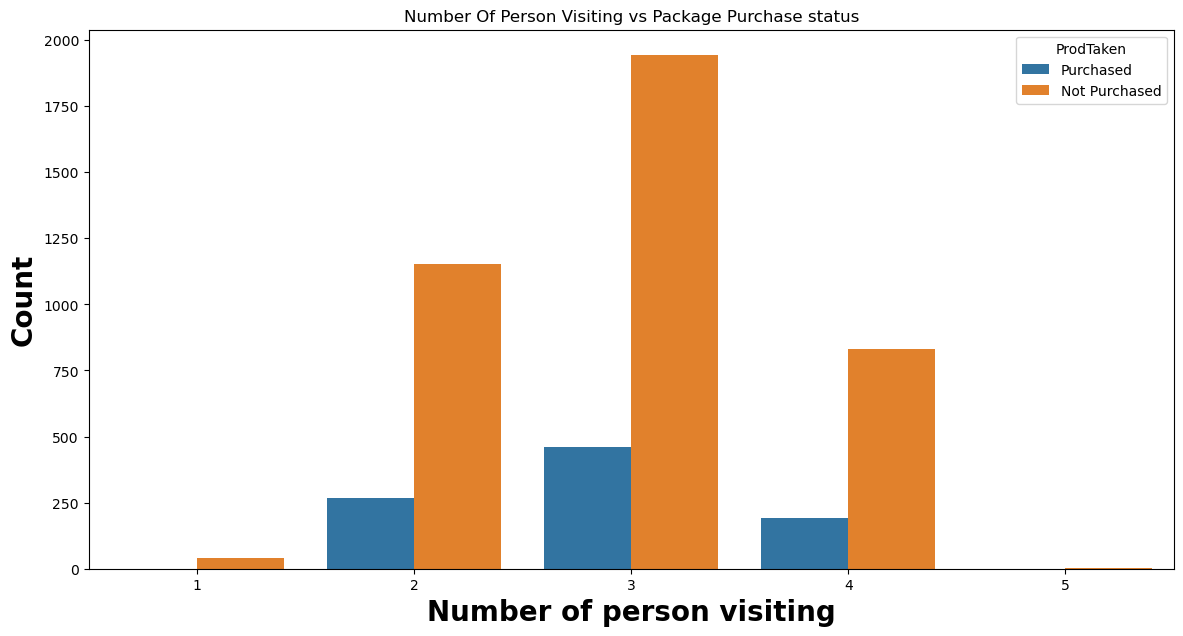

In [135]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df2['NumberOfPersonVisiting'], hue=df2['ProdTaken'])
plt.ylabel("Count",weight="bold", fontsize=20)
plt.xlabel("Number of person visiting",weight="bold", fontsize=20)
plt.title("Number Of Person Visiting vs Package Purchase status")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Person_Visitin_Distribution_target_variable")
plt.show()

**Report:**
* As per the Chart Most Purchase were from 3 People. That might be 3 Unmarried Friends or a Family with Couple and a Child.
* Followed by 2 Number of Person.

### Number of Sales Followup  vs Product Purchase

In [136]:
df3 = df2[df2['ProdTaken']=='Purchased']

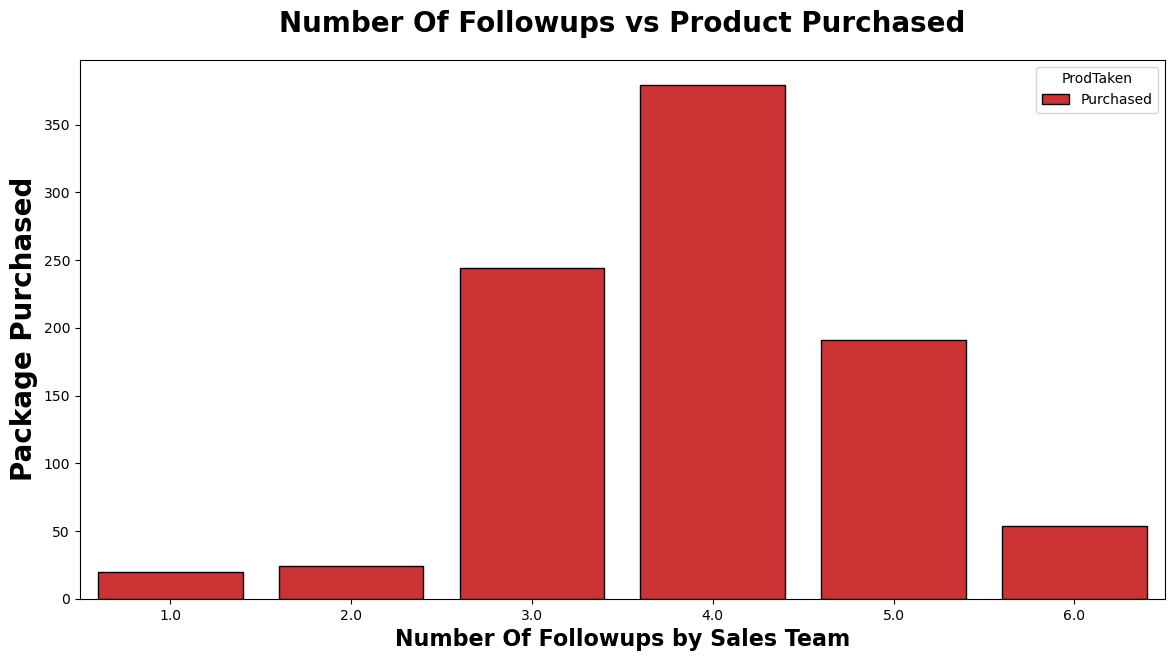

In [140]:
plt.subplots(figsize=(14,7))
sns.countplot(x="NumberOfFollowups",hue="ProdTaken", data= df3,ec = "black",palette="Set1")
plt.title("Number Of Followups vs Product Purchased", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Number Of Followups by Sales Team", weight="bold", fontsize=16)
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Followups_Distribution_target_variable")
plt.show()

**Report:**
* As per the Chart If Sales team Follows Up like 4 times gets more people Purchasing.

### City Tier vs Purchase Status

In [141]:
df2.groupby('CityTier')['ProdTaken'].value_counts(normalize=True)

CityTier  ProdTaken    
1         Not Purchased    0.836991
          Purchased        0.163009
2         Not Purchased    0.767677
          Purchased        0.232323
3         Not Purchased    0.764000
          Purchased        0.236000
Name: ProdTaken, dtype: float64

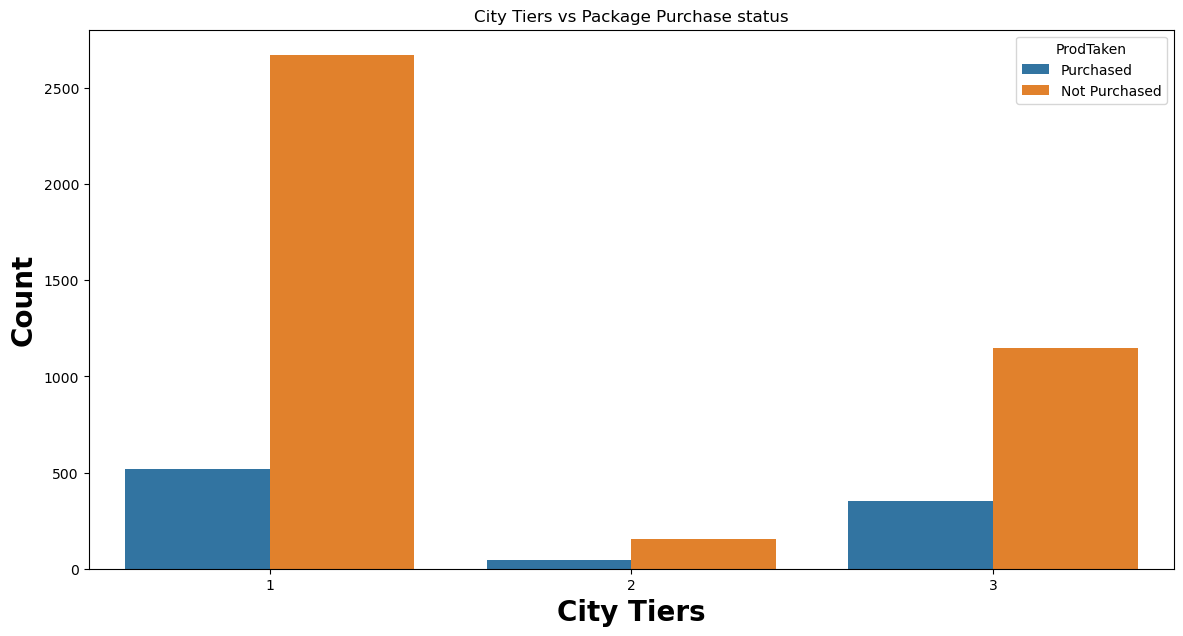

In [142]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df2['CityTier'], hue=df2['ProdTaken'])
plt.ylabel("Count",weight="bold", fontsize=20)
plt.xlabel("City Tiers",weight="bold", fontsize=20)
plt.title("City Tiers vs Package Purchase status")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\City_Tiers_Distribution_target_variable")
plt.show()

**Report:**
* Many customers are from City tier 1 compared to other tier.
* The acceptance ratio of holiday package offers is more for than Tier 3 customers.
* City Tier has very good impact on target variable.

### Occupation vs Product Purchase

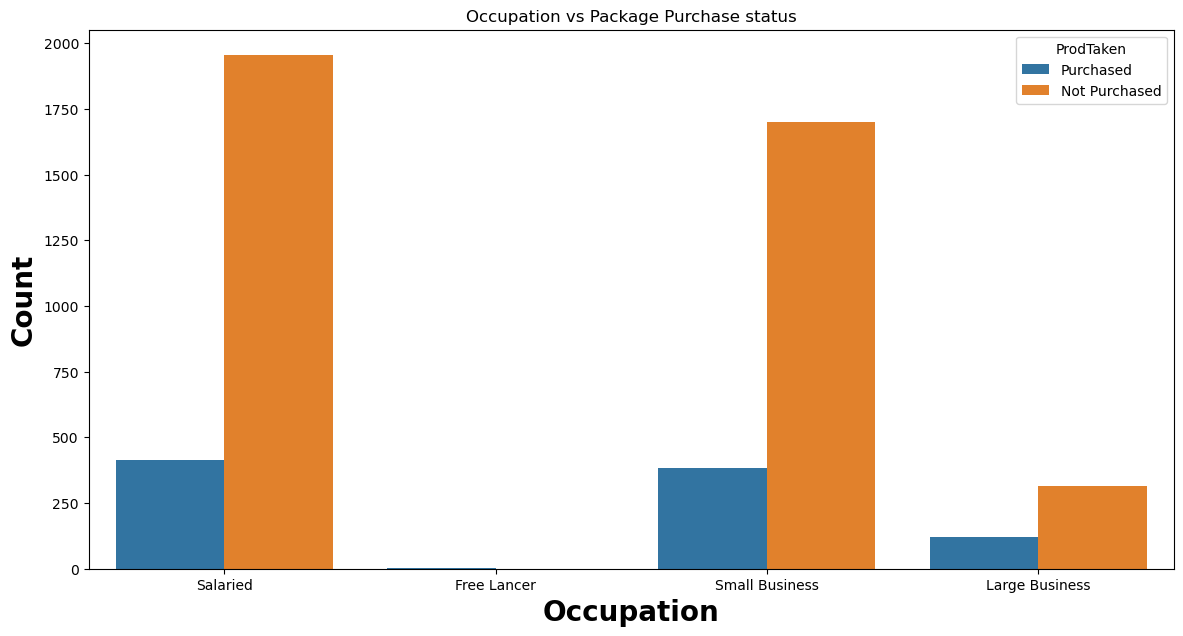

In [143]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df2['Occupation'], hue=df2['ProdTaken'])
plt.ylabel("Count",weight="bold", fontsize=20)
plt.xlabel("Occupation",weight="bold", fontsize=20)
plt.title("Occupation vs Package Purchase status")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Occupation_Distribution_target_variable")
plt.show()

**Report:**
* Salaried and Small Business people have higher offerings as well as purchases of holiday packages.

### Product Pitched and Product's Status

**Product Pitched and Purchased**

In [146]:
df4.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


In [145]:
df4 = df[df['ProdTaken']==1]

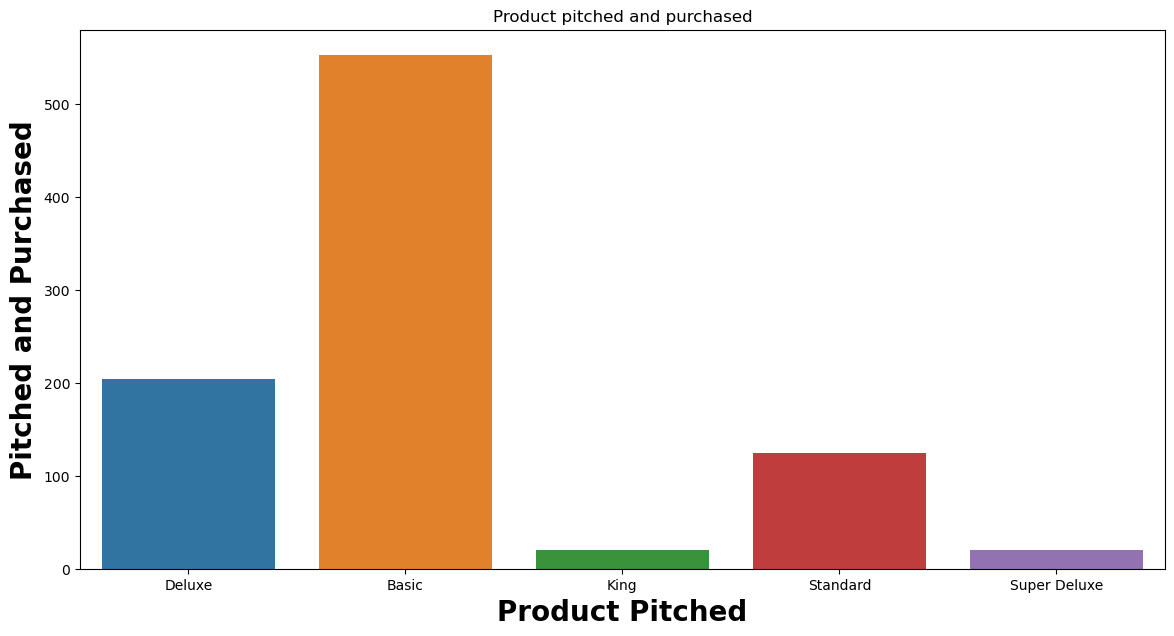

In [149]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df4['ProductPitched'])
plt.ylabel("Pitched and Purchased",weight="bold", fontsize=20)
plt.xlabel("Product Pitched",weight="bold", fontsize=20)
plt.title("Product pitched and purchased")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Pitched_Purchased_Distribution_target_variable")
plt.show()

**Report:**
* Basic Package was the most preferred package by customers
* King Package is least preferred.

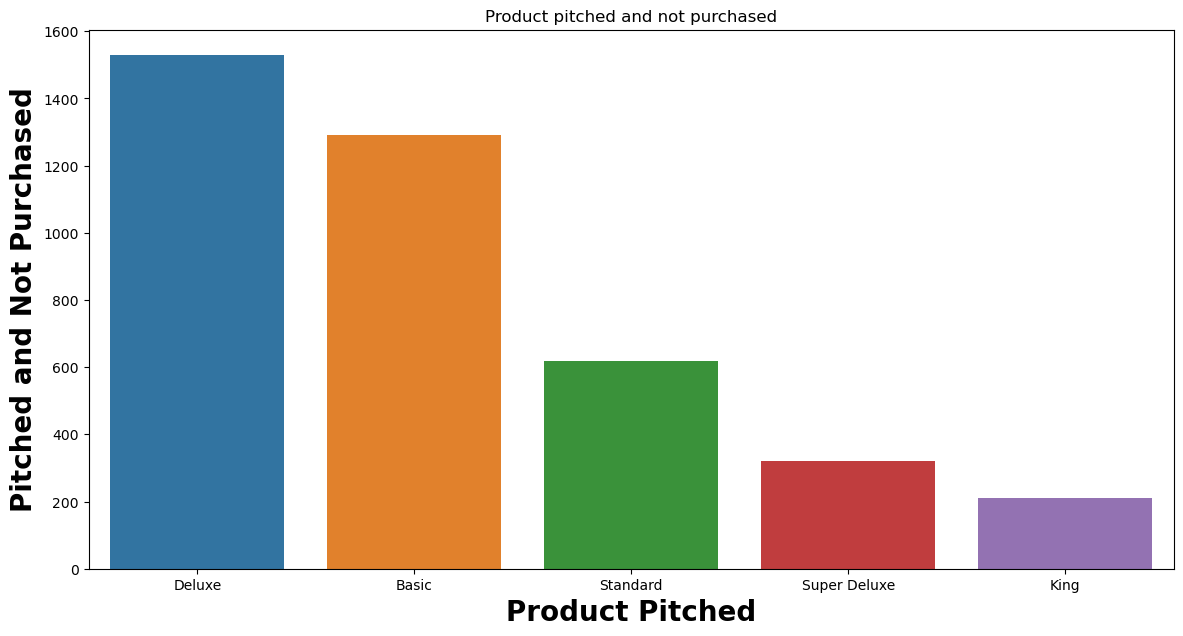

In [151]:
fig = plt.subplots(figsize=(14,7))
sns.countplot(x=df5['ProductPitched'])
plt.ylabel("Pitched and Not Purchased",weight="bold", fontsize=20)
plt.xlabel("Product Pitched",weight="bold", fontsize=20)
plt.title("Product pitched and not purchased")


plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Pitched_Not-Purchased_Distribution_target_variable")
plt.show()

**Report:**
* Deluxe Package was the most Pitched package by Sales Yet People didnt buy it.
* Reducing the cost of Deluxe Package might help.

### Preferred Property Star vs Product Purchase

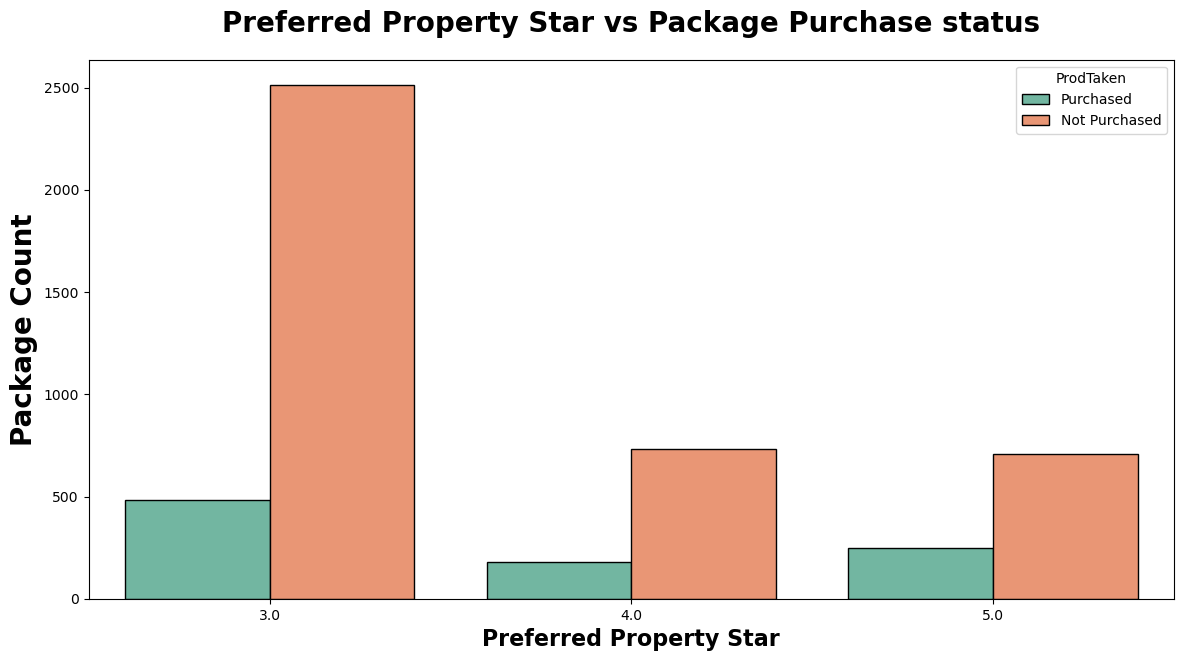

In [153]:
plt.subplots(figsize=(14,7))
sns.countplot(x="PreferredPropertyStar",hue="ProdTaken", data= df2,ec = "black",palette="Set2")
plt.title("Preferred Property Star vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Preferred Property Star", weight="bold", fontsize=16)
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\PropertyStar_Distribution_target_variable")
plt.show()


### Passport vs Package Purchase

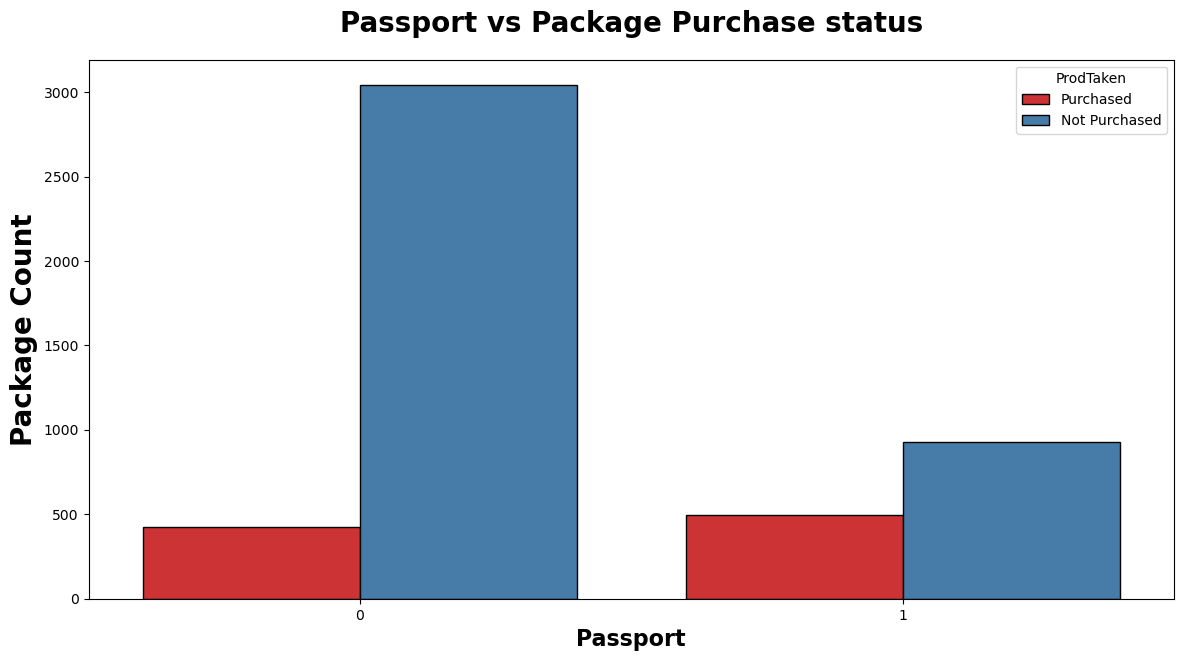

In [156]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Passport",hue="ProdTaken", data= df2,ec = "black",palette="Set1")
plt.title("Passport vs Package Purchase status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Passport_Distribution_target_variable")
plt.show()

### Number of Trips vs Package Purchase

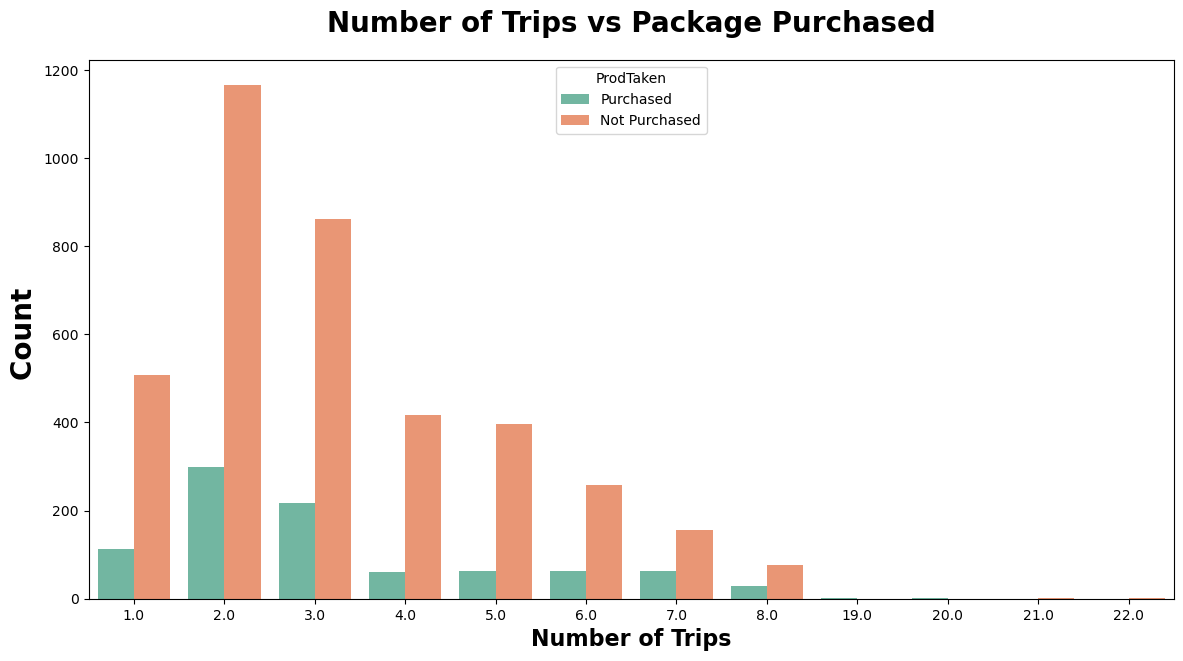

In [166]:
plt.figure(figsize=(14,7))
sns.countplot(x = df2['NumberOfTrips'], hue=df2['ProdTaken'], palette="Set2")
plt.title("Number of Trips vs Package Purchased", weight = "bold",fontsize=20, pad=20)
plt.xlabel("Number of Trips",weight="bold", fontsize=16)
plt.ylabel("Count ",weight="bold", fontsize=20)
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\NoOfTrips_Distribution_target_variable")
plt.show()

### Designation vs Package Purchased

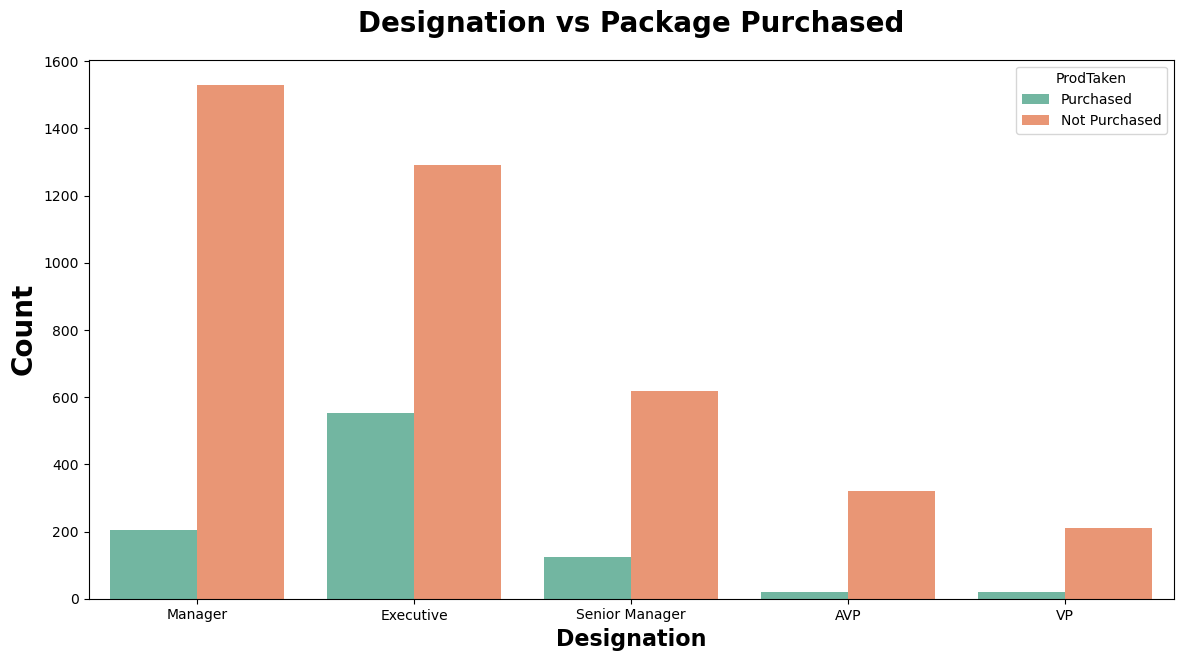

In [165]:
plt.figure(figsize=(14,7))
sns.countplot(x = df2['Designation'], hue=df2['ProdTaken'], palette="Set2")
plt.title("Designation vs Package Purchased", weight = "bold",fontsize=20, pad=20)
plt.xlabel("Designation",weight="bold", fontsize=16)
plt.ylabel("Count",weight="bold", fontsize=20)
plt.savefig(r"C:\Jupyter_Github\Holiday_Package_Prediction\Designation_Distribution_target_variable")
plt.show()

**Report**
* Executives have purchased the package more times than any other designation.
* This feature has very good impact on target variable.

# Summary of EDA

* In 'Gender' and 'MaritalStatus' column there are misspellings which need to be corrected.
* 'ProdTaken' is the target column.
* The 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting' columns have a positive correlation they can be combined to form   a new feature
* Sales Pitch for 5 to 20 minutes is a very good range.
* Follow Ups on sales pitch more than 3 times has given good results.
* Some numeric columns that appear completely uncorrelated to the target can be deleted.



## 4) Data Cleaning

**Handling Spelling Issues**

In [167]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


In [188]:

df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

**Handling Null Values**

In [169]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [171]:
null_features = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
null_features

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [172]:
df[null_features].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Assuming null values among different columns are independent of each other, we are pursuin following strategy.

In [175]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0


**Imputing 'Age' null values with median**

In [173]:
df['Age'].fillna(df['Age'].median(), inplace=True)

**Imputing 'DurationOfPitch' null values with median**

In [174]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)

**Imputing 'TypeOfContact' null values with median**

In [180]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

**Imputing 'NumberOfFollowups' null values with mode**

In [181]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

**Imputing 'PreferredPropertyStar' null values with mode**

In [182]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

**Imputing 'NumberOfTrips' null values with median**

In [183]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)

**Imputing 'NumberOfChildrenVisiting' null values with mode**

In [184]:
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

**Imputing 'MonthlyIncome' null values with median**

In [185]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

### Handling Duplicates and Redundant Rows

In [187]:
df.head(1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0


In [186]:
df.duplicated().sum()

0


**Dropping 'CustomerID' and 'Gender' as they doesn't explain Target Variable**

In [189]:
print(df.shape)
df.drop(columns=['CustomerID','Gender'], axis=1, inplace=True)
print(df.shape)

(4888, 20)
(4888, 18)


## 5) Data Pre-processing

**Feature Extraction**

In [190]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1, inplace=True)

In [191]:
print(df.shape)

(4888, 17)


**Numerical and Categorical features**

In [237]:
num_features = [feature for feature in df.columns if df[feature].dtypes!="object"]

In [194]:
len(num_features)

12

In [195]:
cat_features = [feature for feature in df.columns if feature not in num_features]

In [196]:
len(cat_features)

5

**Further dividing Numerical features into Continuous features and Discrete features**

In [199]:
cont_features = [feature for feature in num_features if len(df[feature].unique())>25]

In [200]:
len(cont_features)

3

In [202]:
disc_features = [feature for feature in num_features if feature not in cont_features]

In [203]:
len(disc_features)

9

### Multicollinearity check with Variance Inflation Factor

**We use VIF in order to make decision regarding variable's removal.**

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



def calculate_vif(df, independent_cols):
 
    X = df[independent_cols].copy()  
    X = pd.get_dummies(X, drop_first=True)  
    X['Intercept']= 1

    vif_values = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]
    vif_series = pd.Series(vif_values, index=X.columns[:])
    
    
    
      

    return vif_series


In [205]:
df1 = df.copy()

In [206]:
df1.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0


In [208]:
df1 = df1.drop('ProdTaken',axis=1)
num_features_1 = [feature for feature in df1.columns if df1[feature].dtypes !='object']

In [210]:
vif_list = calculate_vif(df1,num_features_1)

In [211]:
vif_list.to_frame()

,0
Age,1.327652
CityTier,1.008257
DurationOfPitch,1.005349
NumberOfFollowups,1.156168
PreferredPropertyStar,1.004181
NumberOfTrips,1.080676
Passport,1.003321
PitchSatisfactionScore,1.008258
OwnCar,1.012317
MonthlyIncome,1.380273


*We ignore Intercept*

**We can see none of the VIF's are above 10, hence no need to remove any of the features**

### Handling Outliers 

**We will check outliers in the Continuous Features**

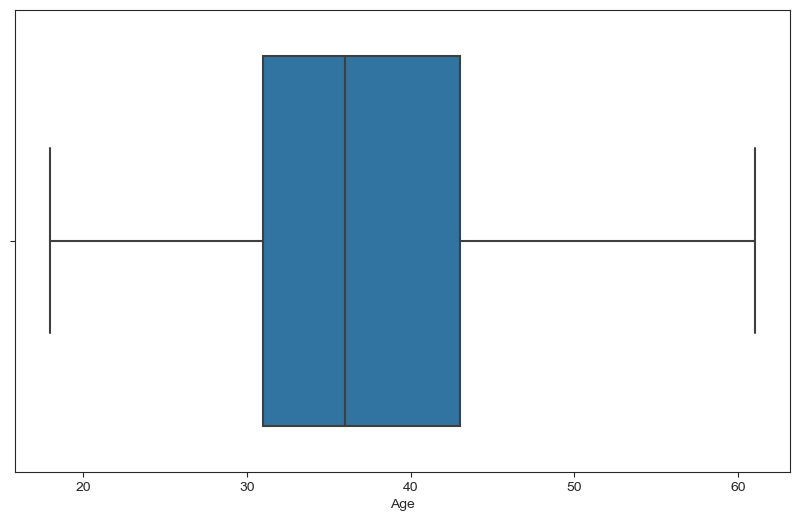

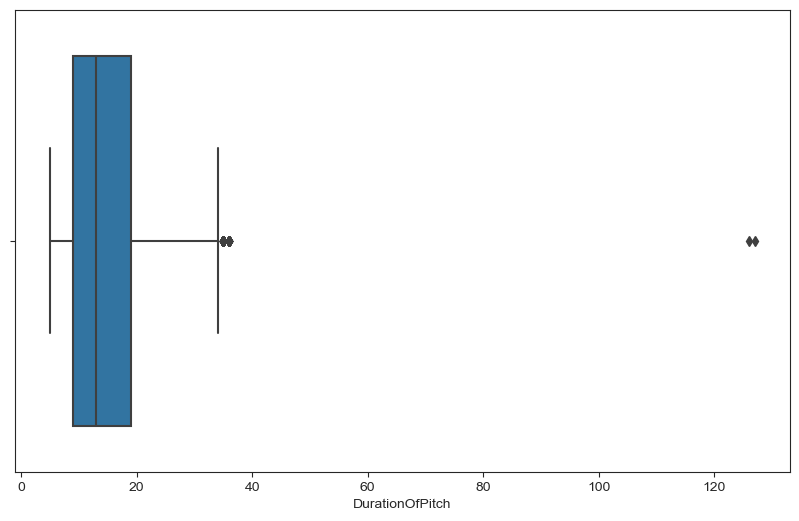

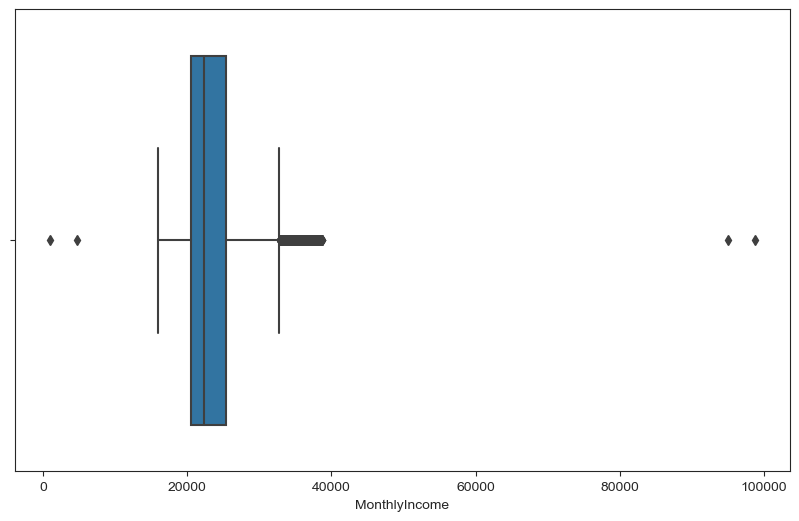

In [215]:
for i in cont_features:
    plt.figure(figsize=(10,6))
    sns.set_style('ticks')
    ax = sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
        

**We can see outliers are present in the continuous features**

### Capping Outliers

In [216]:
def capping_outliers(col):
    #Finding InterQuartile Range
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    print("!!!!!!!!! ",col," !!!!!!!!!")
    print(f"The 25th percentile is {percentile_25}")
    print(f"The 75th percentile is {percentile_75}")
    IQR = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5*(IQR)
    lower_limit = percentile_25 - 1.5*(IQR)
    print(f"Upper Limit is {upper_limit}")
    print(f"Lower Limit is {lower_limit}")
    df.loc[df[col]>upper_limit,col] = upper_limit
    df.loc[df[col]<lower_limit,col] = lower_limit
    
    return df
    
    

In [217]:
for col in cont_features:
    capping_outliers(col)

!!!!!!!!!  Age  !!!!!!!!!
The 25th percentile is 31.0
The 75th percentile is 43.0
Upper Limit is 61.0
Lower Limit is 13.0
!!!!!!!!!  DurationOfPitch  !!!!!!!!!
The 25th percentile is 9.0
The 75th percentile is 19.0
Upper Limit is 34.0
Lower Limit is -6.0
!!!!!!!!!  MonthlyIncome  !!!!!!!!!
The 25th percentile is 20485.0
The 75th percentile is 25424.75
Upper Limit is 32834.375
Lower Limit is 13075.375


**We have capped the outliers, instead of removing them**

#### Skewness after Capping Outliers

In [219]:
df[cont_features].skew(axis=0, skipna=True)

Age                0.415796
DurationOfPitch    0.942638
MonthlyIncome      0.726163
dtype: float64

**Feature Transformation**

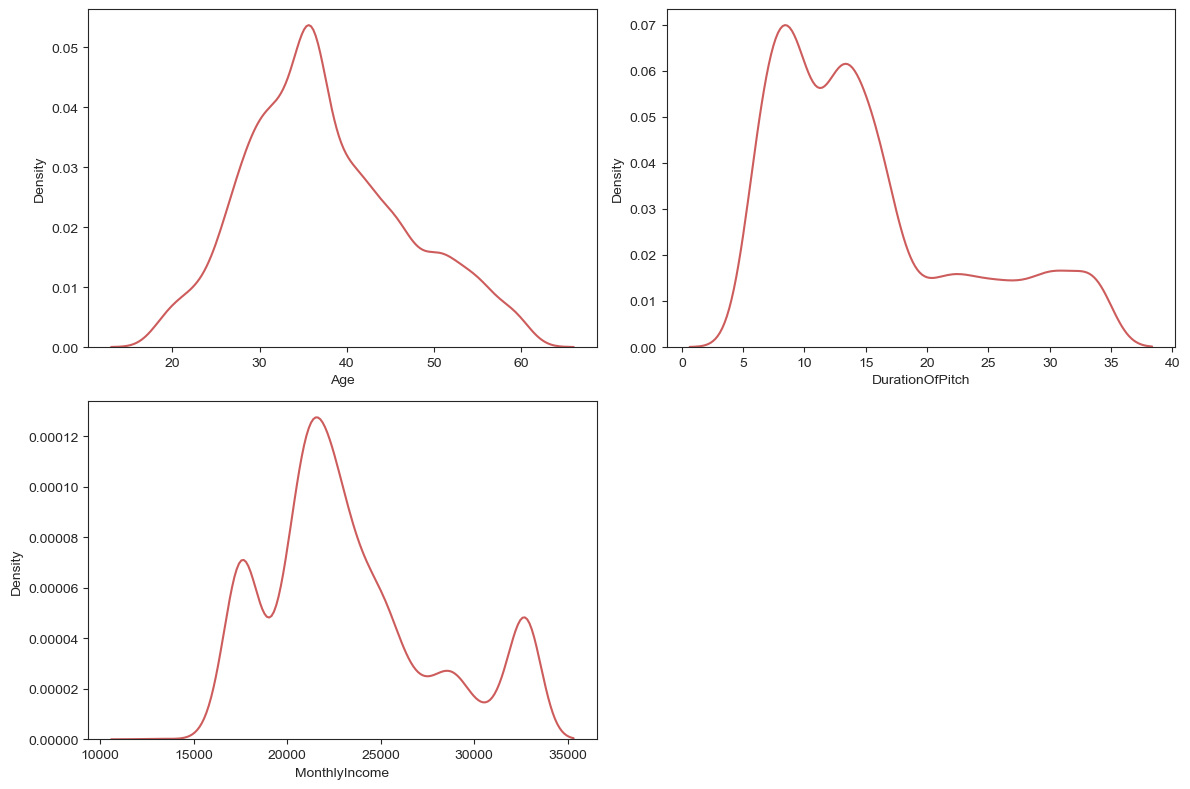

In [222]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age','DurationOfPitch', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**We can see 'Age' and 'MonthlyIncome' are normally distributed. But 'DurationOfPitch' is still skewed, hence its transformation is needed**

In [223]:
df['DurationOfPitch'] = df['DurationOfPitch'].apply(np.log1p)

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

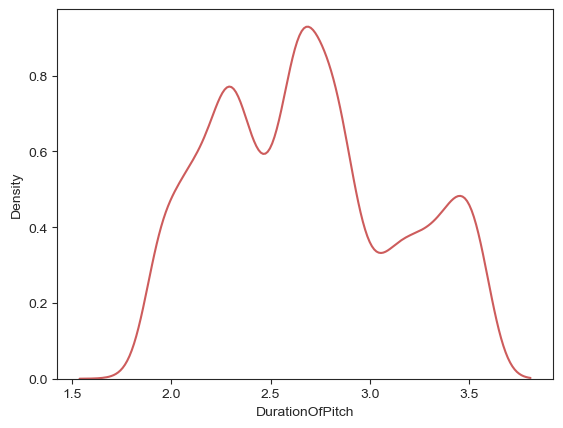

In [224]:
sns.kdeplot(df['DurationOfPitch'], color='indianred')

**Column 'DurationOfPitch' is close to normal now**

## 6) Model Training

In [226]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']
print(X.shape)
print(y.shape)

(4888, 16)
(4888,)


In [227]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

TypeofContact : 2
Occupation : 4
ProductPitched : 5
MaritalStatus : 3
Designation : 5


**Since number of unique counts is less in number, we will use OneHotEncoding for Categotical features**

**For Numerical features, we will use Standard Scaler for scaling**

In [228]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,1.945910,Salaried,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,2.708050,Salaried,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,2.197225,Free Lancer,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,2.302585,Salaried,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,2.197225,Small Business,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


### Encoding and Scaling

In [243]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [244]:
cat_features

Index(['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus',
       'Designation'],
      dtype='object')

In [245]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [246]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features)
        
    ]
)

In [247]:
X= preprocessor.fit_transform(X)

### Handling Imbalanced Data

In [249]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

**We can see data is imbalanced**

In [252]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(random_state=42,sampling_strategy='minority' )
X_res, y_res = smote.fit_resample(X, y)

In [253]:
y_res.value_counts()

1    3909
0    3219
Name: ProdTaken, dtype: int64

**Now the data is balanced**

### Train Test Split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5702, 30)
(1426, 30)


### Model Selection

**We will try multiple classification modelling technique and will choose 4 with highest accuracy for 
hyperparameter tuning**

In [257]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,\
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

**Creating an evaluate function**

In [258]:
def evaluate_model(true,predicted):
    model_accuracy = accuracy_score(true, predicted) 
    model_f1 = f1_score(true, predicted, average='weighted') 
    model_precision = precision_score(true, predicted)
    model_recall = recall_score(true, predicted) 
    model_rocauc_score = roc_auc_score(true, predicted)

    
    return model_accuracy,model_f1,model_precision,model_recall,model_rocauc_score

In [259]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
     "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

models_test_accuracy  = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_accuracy,model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score = evaluate_model(y_train,y_train_pred)
    model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score = evaluate_model(y_test,y_test_pred)
    
    
    models_test_accuracy[list(models.keys())[i]] =  model_test_accuracy
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    
    


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9755
- F1 score: 0.9755
- Precision: 0.9789
- Recall: 0.9750
- Roc Auc Score: 0.9755


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9474
- F1 score: 0.9474
- Precision: 0.9455
- Recall: 0.9566
- Roc Auc Score: 0.9467


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9242
- F1 score: 0.9243
- Precision: 0.9418
- Recall: 0.9196
- Roc Auc Score: 0.9248
----------------------------------
Model performance for Test set
- Accuracy: 0.9067
- F1 score: 0.9068
- Precision: 0.9255
- Recall: 0.8975
- Roc Auc Score: 0.9074


Logistic Regression
Model performance for Training 

In [262]:
sorted_models_test_accuracy = dict(sorted(models_test_accuracy.items(), key=lambda item: item[1]))


In [263]:
sorted_models_test_accuracy = dict(reversed(sorted_models_test_accuracy.items()))

In [264]:
df_accuracy = pd.DataFrame(list(sorted_models_test_accuracy.items()), columns=['Model', 'Accuracy Score'])

In [265]:
df_accuracy

,Model,Accuracy Score
0,Random Forest,0.975456
1,XGBClassifier,0.969846
2,CatBoosting Classifier,0.967742
3,K-Neighbors Classifier,0.965638
4,Decision Tree,0.947405
5,Support Vector Classifier,0.933380
6,Gradient Boosting,0.906732
7,AdaBoost Classifier,0.845021
8,Logistic Regression,0.759467


**We can see top 4 models with highest accuracy score are Random Forest Classifier, XGBClassifier, CatBoosting Classifier
and K-Neighbours Classifier**

In [279]:
knn_params = {"n_neighbors": [2, 5, 10, 15, 20]}

rf_params = { "max_depth": [5, 10, 15, None],  # Reduced to meaningful depths
    "max_features": [5, 8, "auto"],  # Removed less common values
    "min_samples_split": [2, 10, 20],  # Reduced to key splits
    "n_estimators": [100, 200, 500]
            }

xgboost_params ={ "learning_rate": [0.1, 0.01],  # Standard learning rates
    "max_depth": [5, 10, 20],  # Reduced depths
    "n_estimators": [100, 200],  # Common number of estimators
    "colsample_bytree": [0.5, 0.8, 1.0] 
                }# Common values for tree sampling

cat_params =  {
    "learning_rate": [0.1, 0.01],  # Standard learning rates
    "max_depth": [5, 10, 20]  # Reduced depths
}

In [280]:
randomcv_models = [('KNN', KNeighborsClassifier(), knn_params),
                   ("RF", RandomForestClassifier(), rf_params),
                   ('XGBoost', XGBClassifier(), xgboost_params),
                   ('CatBoost', CatBoostClassifier(verbose=False), cat_params)
                   ]

In [282]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=50,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=2; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END .....................................n_neighbors=10; total time=   0.3s
[CV] END .....................................n_neighbors=10; total time=   0.3s
[CV] END .....................................n_neighbors=10; total time=   0.3s
[CV] END .....................................n_neighbors=15; total time=   0.4s
[CV] END .....................................n_neighbors=15; total time=   0.4s
[CV] END .....................................n_n

### Using best parameters retraining whole models

In [286]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, min_samples_split = 2, max_features=8,max_depth=None),
     "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors = 2),
     "XGBClassifier": XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.1,colsample_bytree=0.8), 
     "CatBoosting Classifier": CatBoostClassifier(max_depth=10,learning_rate=0.1,verbose=False),
     
}

models_test_accuracy_ht  = {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_accuracy,model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score = evaluate_model(y_train,y_train_pred)
    model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score = evaluate_model(y_test,y_test_pred)
    
    
    models_test_accuracy_ht[list(models.keys())[i]] =  model_test_accuracy
    
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')
    
    


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9769
- F1 score: 0.9769
- Precision: 0.9828
- Recall: 0.9737
- Roc Auc Score: 0.9771


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9923
- F1 score: 0.9923
- Precision: 0.9858
- Recall: 1.0000
- Roc Auc Score: 0.9917


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9818
- F1 score: 0.9818
- Precision: 0.9817
- Recall: 0.9842
- Roc Auc Score: 0.9816


CatBoosting Classifier
Model performance for T

In [288]:
sorted_models_test_accuracy_ht = dict(sorted(models_test_accuracy_ht.items(), key=lambda item: item[1]))
sorted_models_test_accuracy_ht = dict(reversed(sorted_models_test_accuracy_ht.items()))
df_accuracy_ht = pd.DataFrame(list(sorted_models_test_accuracy_ht.items()), columns=['Model', 'Accuracy Score'])
df_accuracy_ht

,Model,Accuracy Score
0,K-Neighbors Classifier,0.992286
1,CatBoosting Classifier,0.989481
2,XGBClassifier,0.981767
3,Random Forest,0.976858


### Since Models accuracy score are very high we will use cross validation score for further evaluation.

**Stratified K-fold Cross Validation Technique on 4 algorithm to know the exact Mean CV accuracy score**

In [ ]:
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'max_depth': 10, 'learning_rate': 0.1}

In [284]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)

In [290]:
cat_cv_result = cross_val_score(CatBoostClassifier(max_depth= 10, learning_rate= 0.1,verbose=False),
                                X_test, y_test, cv=skfold,scoring="accuracy",n_jobs=1)
cat_cv = cat_cv_result.mean()*100
print('CatBoost CV Mean Accuarcy Score is {}'.format(cat_cv))

CatBoost CV Mean Accuarcy Score is 93.68758002560821


In [291]:
knn_cv_result = cross_val_score(KNeighborsClassifier(n_neighbors=2),
                                X_test, y_test, cv=skfold,scoring="accuracy",n_jobs=1)
knn_cv = knn_cv_result.mean()*100
print('KNN Classifier CV Mean Accuarcy Score is {}'.format(knn_cv))

KNN Classifier CV Mean Accuarcy Score is 91.58327587905053


In [292]:
rf_cv_result = cross_val_score(RandomForestClassifier(n_estimators=100, min_samples_split=2, max_features= 8,
                                                      max_depth= None), X_test, y_test, cv=skfold,scoring="accuracy",n_jobs=1)
rf_cv = rf_cv_result.mean()*100
print('Random Forest Classifier CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest Classifier CV Mean Accuarcy Score is 90.74460750517088


In [293]:
xgb_cv_result = cross_val_score(XGBClassifier(n_estimators= 200, max_depth= 10, learning_rate= 0.1, colsample_bytree= 0.8,
                                              n_jobs=-1), X_test, y_test, cv=skfold,scoring="accuracy",n_jobs=1)
xgb_cv = xgb_cv_result.mean()*100
print('XGB Classifier CV Mean Accuarcy Score is {}'.format(xgb_cv))

XGB Classifier CV Mean Accuarcy Score is 91.44440066975278


# Best Model

In [294]:
best_model = CatBoostClassifier(max_depth= 10, learning_rate= 0.1,verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL : 'CATBOOST'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL : 'CATBOOST'
Accuracy Score value: 0.9895
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       665
           1       0.99      0.99      0.99       761

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



## Saving best model as pickle file

In [295]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_model, open('CatBoostClassification.pkl', 'wb'))